# Исследовательский анализ данных по просмотрам пользователей в VK Видео за день на IOS и Android

- Автор:Кононов С.В.

## 1.1 Цели и задачи проекта

**Цель:** Провести исследовательский анализ данных о просмотрах видео на различных платформах с целью выявления ключевых паттернов поведения пользователей. Выяснить, как зависит осознанность просмотров от платформы. Изучить, как распределены просмотры среди топ-10 сообществ.
 
**Задачи:**

1. Загрузить данные и провести первичный анализ.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - Подсчитать, какая платформа имела больше всего осознанных просмотров (длительность просмотров >= 30 секундам)
    - Выявить топ-10 сообществ по total_view_time после очистки выбросов.
4. Сформулировать выводы по проведённому анализу.

## 1.2 Описание данных

**Названия файла:** `video_sessions_transformed.csv`

**Период:** 1 день

**Описание датасета:**

- `user_id` - идентификатор пользователя
- `video_owner_id` - идентификатор сообщества
- `total_view_time` - время просмотра в секундах
- `vk_platform` - платформа, с которой был произведен просмотр
- `nav_screen` - экран смотрения
- `video_id` - идентификатор видео

## 2 Загрузка и первичный анализ данных

### 2.1 Вывод общей информации

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r'C:\Users\svyat\Downloads\video_sessions_transformed.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          4503 non-null   int64 
 1   video_owner_id   4503 non-null   int64 
 2   total_view_time  4503 non-null   int64 
 3   vk_platform      4503 non-null   object
 4   nav_screen       4503 non-null   object
 5   video_id         4503 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 211.2+ KB


In [9]:
df.head(10)

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
0,5137060586,197846393764,0,vk_video_ios,video_for_you,1524753638856
1,6791352918,255312742952,0,vk_video_android,video_search,1524750811524
2,8499858010,290290140528,2,vk_video_android,video_for_you,1524751697154
3,13064371614,296968444192,0,vk_video_android,video_search,1524751112304
4,15865765790,283074246524,0,vk_video_android,video_for_you,1524752278662
5,19297132316,283218770392,2,vk_video_android,video_search,1524750995334
6,30021119002,125716034912,0,vk_video_android,video_search,1524755964888
7,32740290492,92331463620,0,vk_video_android,video_search,572423140620
8,41937384832,292278366172,0,vk_video_ios,video_for_you,1524753842718
9,46106848046,83801670412,1,vk_video_ios,video_for_you,1524755867970


In [10]:
pd.set_option('display.float_format', '{:.2f}'.format)
df['total_view_time'].describe()

count        4503.00
mean       104659.89
std       4959591.64
min          -300.00
25%             0.00
50%             0.00
75%             2.00
max     240502233.00
Name: total_view_time, dtype: float64

### 2.2 Промежуточный вывод по датасету `df`

Датасет `df` содержит 6 столбцов и 4503 строки.

- 4 столбца представлены в формате int64 и 2 в object, на первый взгляд типы данных не требуют предобработки
- Названия столбцов представлены в едином стиле и не требуют предобработки
- В данных не обнаружено содержание пропусков
- В столбце `total_view_time` обнаружены отрицательные значения, что свидетельствует о выбросах. В дальнейшем следует исследовать этот столбец детальнее.

## 3 Предобработка данных

### 3.1 Анализ и обработка выбросов

In [15]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
user_id,4503.00,12335439677763.86,10768789828243.47,208518338.00,2248819224981.00,9657196427816.00,20482626682889.00,37299994520642.00
video_owner_id,4503.00,181159332950.28,201580297878.99,-1122276752848.00,137716120828.00,254289612684.00,283977180100.00,2649072653164.00
total_view_time,4503.00,104659.89,4959591.64,-300.00,0.00,0.00,2.00,240502233.00
video_id,4503.00,1508004913273.82,128912974406.16,2344280.00,1524751804098.00,1524754283862.00,1524762206073.00,1525611877824.00


В столбцах `total_view_time` и `video_owner_id` обнаружены отрицательные значения, они явно являются выбросами, т.к. в данных столбцах содержатся время просмотров и id сообщества, которые не могут быть отрицательными. Удалим строки с этими значениями

In [17]:
df_new = df[df['video_owner_id'] > 0]
df_new = df_new[df_new['total_view_time'] >= 0]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4253 entries, 0 to 4502
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          4253 non-null   int64 
 1   video_owner_id   4253 non-null   int64 
 2   total_view_time  4253 non-null   int64 
 3   vk_platform      4253 non-null   object
 4   nav_screen       4253 non-null   object
 5   video_id         4253 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 232.6+ KB


In [18]:
df.shape[0] - df_new.shape[0] 

250

Было удалено 250 строк

In [20]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,4253.00,12255947110964.20,10754539001008.76,208518338.00,2235030962430.00,9536440516736.00,20363907916660.00,37299994520642.00
video_owner_id,4253.00,217104880896.20,116548465830.38,62228.00,145819277544.00,262794852312.00,284981117664.00,2649072653164.00
total_view_time,4253.00,110802.99,5103244.40,0.00,0.00,0.00,2.00,240502233.00
video_id,4253.00,1512911408150.62,108369770409.38,152473232.00,1524751860912.00,1524754313940.00,1524762612126.00,1525611877824.00


В столбце `total_view_time` в части строк содержится значением 0, что может говорить о технической ошибке. Однако медиана(50%) = 0 , это говорит о том, что значительная часть данных содержит 0 в этом столбце. Таким образом, данное значение, вероястно, получилось в результате быстрого выхода: пользователь закрыл видео сразу после запуска.

In [22]:
240502233 / (3600 * 24)

2783.5906597222224

С другой стороны максимальное значение времени просмотра составляет 2783.59 дня, что является явным выбросом. Т.к. 1 квартиль = 0 , а 3 = 2 секндам , то удаление пропусков с помощью межквартильного размаха удалит многие значения, которые не являются выбросами. Поэтому найдём 95 квантиль.

In [24]:
quantile_95 = df_new['total_view_time'].quantile(0.95) / 60
quantile_95

11.776666666666491

In [25]:
quantile_95 = quantile_95 * 60

Вполне реально, что какой-то просмотр длился 11.7 минут

In [27]:
df_new['total_view_time'].quantile(0.97) / 60

26.179333333333307

In [28]:
df_new['total_view_time'].quantile(0.98) / 60

38.69933333333335

In [29]:
df_new['total_view_time'].quantile(0.99) / 60

60.67066666666512

Значения в 26, 38 и даже 60 минут тоже выглядят вполне реалистичными, но учитывая, что большенство значений <= 2 секунд , то удалим значения > 95 квантиля, чтобы при дальнейшем анализе и выявлении топа сооществ данные значения не повлияли критично на результат.

In [31]:
df_new = df_new[df_new['total_view_time'] <= quantile_95]
df_new['total_view_time'].describe()

count   4040.00
mean      11.23
std       62.95
min        0.00
25%        0.00
50%        0.00
75%        2.00
max      695.00
Name: total_view_time, dtype: float64

In [32]:
df.shape[0] - df_new.shape[0]

463

### 3.2 Промежуточные выводы

В результате обработки пропусков были удалены аномально низкие значения (< 0) из столбцов `total_view_time` и `video_owner_id`. Также, так как цель исследования - выявление ключевых паттернов, то из столбца `total_view_time` были удалены значения > 95 квантиля, которые могли негативно повлиять в большую сторону при анализе длительности просмотров.

Распределение данных после обработки пропусков:
- большинство просмотров (75%) длятся менее <= 2 секунд. При этом 50% длятся 0 секунд. Это указывает на низкую вовлеченность пользователей.
- максимальное значение равно 695 секунд, что реалистично для платформы.

Всего было удалено 463 строки.

## 4 Исследовательский анализ данных

### 4.1 Анализ количества осознанных просмотров по платформам

Осознанный просмотр - просмотр, длительность которого >= 30 секунд

In [38]:
# фильтруем данные по времени просмотра >= 30c
df_filter = df_new[df_new['total_view_time'] >= 30]
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 163 to 4439
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          161 non-null    int64 
 1   video_owner_id   161 non-null    int64 
 2   total_view_time  161 non-null    int64 
 3   vk_platform      161 non-null    object
 4   nav_screen       161 non-null    object
 5   video_id         161 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 8.8+ KB


In [39]:
round(df_filter.shape[0] / df_new.shape[0] * 100, 2)

3.99

Всего 3.99% данных содержат информацию об осознанных просмотрах. Это указывает на малую вовлеченность аудитории в контент клатформы

In [41]:
# группируем данные по платформе и находим количество осмысленных просмотров
df_top_platform = df_filter.groupby('vk_platform')['total_view_time'].count().reset_index()
df_top_platform['vk_platform'] = df_top_platform['vk_platform'].replace({
                                                                         'vk_video_android': 'Android',
                                                                         'vk_video_ios': 'IOS'
                                                                        })
df_top_platform = df_top_platform.rename(columns = {'total_view_time': 'count_conscious_views'})

df_top_platform

,vk_platform,count_conscious_views
0,Android,128
1,IOS,33


In [42]:
# Процент просмотров на андроид от общего числа
128 / 161 * 100

79.5031055900621

In [43]:
# Процент просмотров на айос от общего числа
33 / 161 * 100

20.496894409937887

C:\Users\svyat\AppData\Local\Temp\ipykernel_25160\565682400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_top_platform,


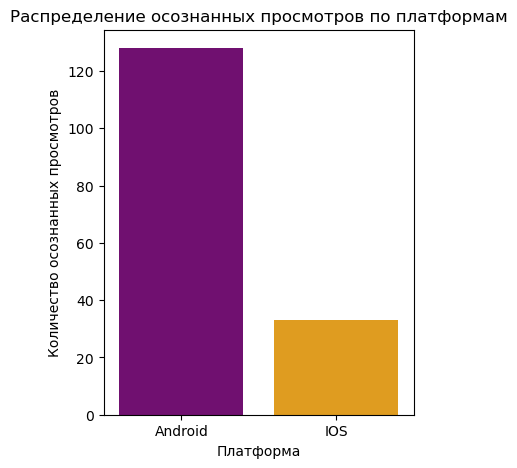

In [44]:
plt.figure(figsize=(4,5))

sns.barplot(data = df_top_platform,
            x = 'vk_platform',
            y = 'count_conscious_views',
            palette = ('purple', 'orange')
           )

plt.title('Распределение осознанных просмотров по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество осознанных просмотров')

plt.show()

### 4.2 Вывод по распределению осознанных просмотров на платформах

Распределение просмотров:
- **Android**: 128 осознанных просмотров(79.5% от общего числа)
- **IOS**: 33 осознанных просмотров(20.5% от общего числа)

Таким образом, пользователи Android проявляют почти в 4 раза больше осознанного взаимодействия с контентом, чем пользователи IOS

Однако, общая доля осознанных просмотров составляет всего 3.99% от всех просмотров, что указывает на **низкую вовлеченность** аудитории платформы.

### 4.3 Топ-10 сообществ по `total_view_time`

In [47]:
df_new['total_view_time'].describe()

count   4040.00
mean      11.23
std       62.95
min        0.00
25%        0.00
50%        0.00
75%        2.00
max      695.00
Name: total_view_time, dtype: float64

Распределения `total_view_time` показывает значительную правостороннюю ассиметрией. Большая значений сосредоточено вблизи нуля (медиана и 75 процентиль равны 0 и 2 соответственно), однако присутствуют и экстремально высокие значения, достигающие 695. Из-за такого распределения среднее значение (11.23) может вводить в заблуждение и сильно завышать результат. При этом медиана также может не отображать действительную картину событий, из-за того, что данные представлены за 1 день и некоторые сообщества могут быть не так популярны, как другие, но при этом иметь высокую глубину просмотра. Поэтому для выявления топ-10 сообществ по времени просмотров будем использовать суммарное время просмотров.

In [49]:
# сгруппируем по сообществам и найдём сумму просмотров для каждого из них
top_video_owner = df_new.groupby('video_owner_id')['total_view_time'].sum().reset_index()

# выделим топ-10 сообществ
top_video_owner = top_video_owner.sort_values(by='total_view_time', ascending = False)
top_10_video_owner = top_video_owner.head(10)
top_10_video_owner = top_10_video_owner.rename(columns = {'total_view_time': 'sum_view_time'})
top_10_video_owner

,video_owner_id,sum_view_time
1339,279672446984,3857
1598,292278366172,2580
1605,292769954132,1787
529,140097381168,1618
835,214109178444,1612
1398,283074246524,1608
821,209969092672,1009
1506,288919613844,918
1344,279942606536,814
828,211638906908,798


<Figure size 800x800 with 0 Axes>

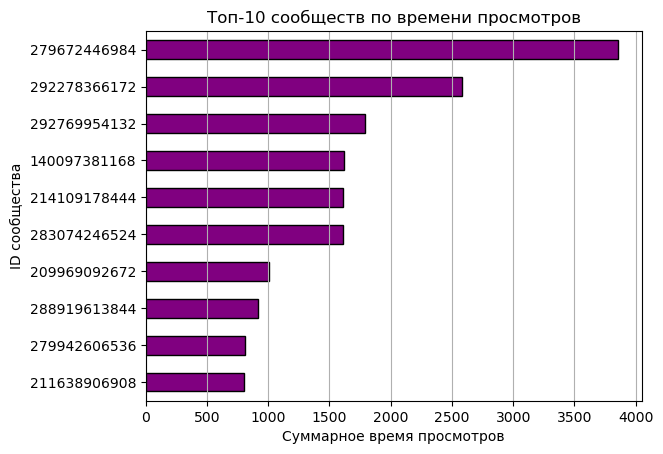

In [50]:
top_10_video_owner = top_10_video_owner.sort_values(by='sum_view_time')

plt.figure(figsize=(8,8))

top_10_video_owner.plot(kind = 'barh',
                        y = 'sum_view_time',
                        x = 'video_owner_id',
                        color = 'purple',
                        edgecolor = 'black',
                        legend = False
                       )

plt.title('Топ-10 сообществ по времени просмотров')
plt.xlabel('Суммарное время просмотров')
plt.ylabel('ID сообщества')

plt.grid(axis = 'x')

plt.show()

### 4.4 Вывод по топ-10 сообществам по времени просмотров

Наблюдается значительный разброс популярности среди сообщетсв: лидер обладает суммарный временем просмотров в 3857, что почти в 5 раз больше, чем у последнего места, у которого всего 798.

Проведенный анализ демонтрирует, что среди сообщест существует явное разделение на группы по суммарному времени просмотров:

- Группа абсолютных лидеров с суммарным временем просмотров свыше 2500 секунд (1 и 2 места)
- Средняя группа с показателями в диапазоне 1500-2000 секунд (3-6 места)
- Группа аутсайдеров с суммарным временем просмотров 1000 и менее (7-10 места) 

### 4.5 Зависимость асознанных просмотров от экрана смотрения

In [53]:
df_top_screen = df_filter.groupby('nav_screen')['total_view_time'].count().reset_index()
df_top_screen = df_top_screen.rename(columns = {'total_view_time': 'count_conscious_views'})
df_top_screen = df_top_screen.sort_values(by='count_conscious_views', ascending = False)
df_top_screen

,nav_screen,count_conscious_views
1,video_for_you,65
5,video_search,63
4,video_my_history,18
2,video_group_all,13
0,catalog_other,1
3,video_group_main,1


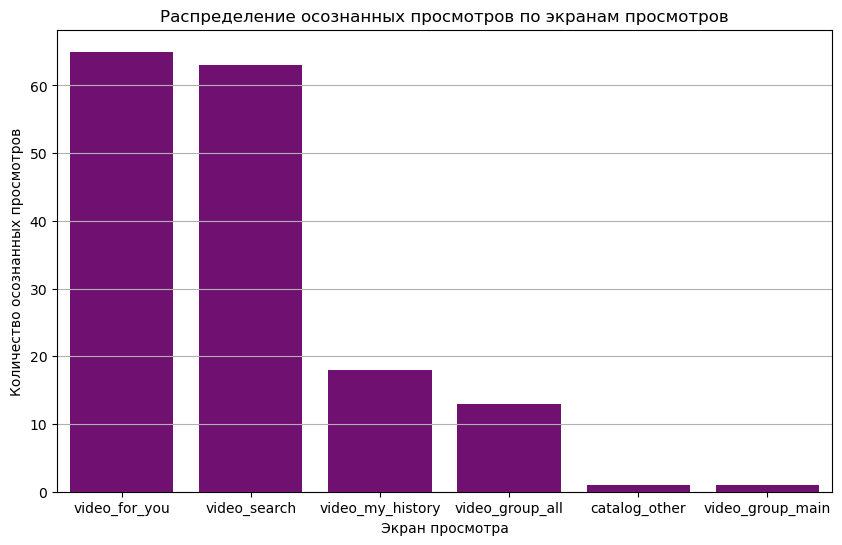

In [89]:
plt.figure(figsize=(10,6))

sns.barplot(data = df_top_screen,
            x = 'nav_screen',
            y = 'count_conscious_views',
            color = 'purple'
           )

plt.title('Распределение осознанных просмотров по экранам просмотров')
plt.xlabel('Экран просмотра')
plt.ylabel('Количество осознанных просмотров')

plt.grid(axis = 'y')

plt.show()

### 4.6 Вывод по распределению осознанных просмотров в зависимости от экрана просмотра

1) Лидеры по вовлеченности:
   
   video_for_you(рекомендации на главной) и video_search(поиск) демонтрируют наибольшее количество осознанных просмотров (65 и 63 соответственно). Это говорит о том, что алгоритмы рекомендаций и поиска эффективно удерживают внимание пользователей.
3) Умеренная вовлеченность:
   
   video_my_history(история просмотров) обладает 18 осознанными просмотрами, что может указывать на вторичный интерес к ранее просмотренному контенту. video_group_all(все видео сообщества) обладает 13 осознанными просмотрами, это демонстрирует, что пользователи средне вовлечены в контент сообществ
4) Низкая вовлеченность:
   
   catalog_other(разное) и video_group_main(главная страница сообщества) имеют минимальные показатели (по 1 осознанному просмотру). Это указывает на то, что пользователи редко заходят напрямую на стриницу сообщества, предпочитая поиск или рекомендации. Также это может указывать, что контент в этих разделах менее оптимизирован для удержания внимания.


## 5 Итоговый вывод по исследовательскому анализу данных о просмотрах пользователей VK Видео за день

В ходе исследовательского анализа были удалены выбросы, проанализировано распределение осознанных просмотров по платформам и выявлен топ-10 сообществ по суммарному времени просмотров. Также дополнительно было изучено рапределение осознанных просмотров в зависимости от экрана просмотра.

### 5.1 Распределение данных и выбросы

- В ходе очистки данных от выбросов были удалены отрицательные значения из столбцов `total_view_time` и `video_owner_id`. Также удалены аномально высокие значения столбца `total_view_time`(> 95 квантиля)
- После удаления выбросов данные обладали правосторонней асимметрией: большинство сессий короткие (медиана = 0 сек), но присутствуют экстремальные значения (до 695 сек).

### 5.2 Анализ осознанных просмотров. Распределение осознанных просмотров по платформам и экранам просмотров.

Осознанные просмотры составляют всего 3.99% от общего числа просмотров, что свидетельствует о низкой вовлеченности аудитории в контент.

Среди **платформ** осознанные просмотры распределились следующим образом:

- **Android**: 128 осознанных просмотров(79.5% от общего числа)
- **IOS**: 33 осознанных просмотров(20.5% от общего числа)

Таким образом, пользователи Android проявляют больший интерес к контенту, чем пользователи IOS. Это может указывать на лучшую оптимизацией сервиса для пользователей Android.
При дальнейшем анализе стоит изучить обладает ли разница в осознанных просмотров между Android и IOS статистической значимостью. А также изучить процентное соотнешение числа осознанных просмотров от общего числа просмотров на каждой платформе.

**Экраны просмотров** влияют на вовлеченность пользователей следующи образом:

- Рекомендации (`video_for_you`) и поиск (`video_search`) генерируют около 80% осознанных просмотров.
- Прямые переходы в сообщества (`video_group_main`) практически не работают (1-2 просмотра)

### 5.3 Топ-10 сообществ по времени просмотров

Обнаружена резкая стратификация:
- топ сообществ по времени просмотров явно поделен на 3 группы по суммарному времени просмотров
- Разрыв между 1 и 10 местом достигает 5 кратного значения.

Стоит обратить внимание на контент, который публикуют сообщества с 1 и 2 мест. Вероятнее всего высокое значение суммарного времени просмотров связано с вирусным контентом, который они публикуют. Также стоит изучить другие факторы, которые могут влиять на удержание пользователей.